In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

# 1.Data Preparation

## 1.1. Data Integration

In [2]:
# Read dataset into data frame
Iq = pd.read_csv('../data/IQ.csv')
It = pd.read_csv('../data/IncTmp.csv')

# Merge two original dataframe into the new one
Iq_It = pd.merge(Iq, It, on=['Id', 'country'])
Iq_It.head()

,Id,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
3,4,Taiwan,106,NaN,NaN,26.9
4,5,China,104,183.0,4654.0,19.1


In [3]:
Iq_It = pd.merge(Iq, It, on=['Id', 'country'])
Iq_It.head()

,Id,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
3,4,Taiwan,106,NaN,NaN,26.9
4,5,China,104,183.0,4654.0,19.1


## 1.2. Data Shuffling

In [4]:
Iq_It.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     108 non-null    int64  
 1   country                108 non-null    object 
 2   IQ                     108 non-null    int64  
 3   education_expenditure  103 non-null    float64
 4   avg_income             106 non-null    float64
 5   avg_temp               108 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 5.2+ KB


In [5]:
from sklearn.utils import shuffle

Iq_It = shuffle(Iq_It)
Iq_It.head()

,Id,country,IQ,education_expenditure,avg_income,avg_temp
31,32,Russia,96,338.0,8241.0,9.5
91,92,Zimbabwe,74,50.0,843.0,27.1
103,104,Equatorial Guinea,56,NaN,7625.0,29.9
98,99,Ethiopia,67,21.0,379.0,27.2
45,46,Kazakhstan,89,225.0,6380.0,13.5


## 1.3. Data Preprocessing

### Handle Duplicate

In [6]:
print(Iq_It)

      Id            country   IQ  education_expenditure  avg_income  avg_temp
31    32             Russia   96                  338.0      8241.0       9.5
91    92           Zimbabwe   74                   50.0       843.0      27.1
103  104  Equatorial Guinea   56                    NaN      7625.0      29.9
98    99           Ethiopia   67                   21.0       379.0      27.2
45    46         Kazakhstan   89                  225.0      6380.0      13.5
..   ...                ...  ...                    ...         ...       ...
19    20            Austria   99                 2341.0     42635.0      13.2
85    86              Sudan   77                   25.0      1168.0      36.5
7      8            Finland  101                 2725.0     42706.0       8.2
42    43             Greece   91                  781.0     21101.0      22.3
88    89               Chad   75                   16.0       630.0      35.6

[108 rows x 6 columns]


In [7]:
duplicates = Iq_It.duplicated()
print("\nDuplicate Row:")
print(Iq_It[duplicates])


Duplicate Row:
Empty DataFrame
Columns: [Id, country, IQ, education_expenditure, avg_income, avg_temp]
Index: []


There are no duplicate in our data

### Handle Missing Values

In [8]:
# Display the DataFrame to inspect it
print("Original DataFrame:")
print(Iq_It)

Original DataFrame:
      Id            country   IQ  education_expenditure  avg_income  avg_temp
31    32             Russia   96                  338.0      8241.0       9.5
91    92           Zimbabwe   74                   50.0       843.0      27.1
103  104  Equatorial Guinea   56                    NaN      7625.0      29.9
98    99           Ethiopia   67                   21.0       379.0      27.2
45    46         Kazakhstan   89                  225.0      6380.0      13.5
..   ...                ...  ...                    ...         ...       ...
19    20            Austria   99                 2341.0     42635.0      13.2
85    86              Sudan   77                   25.0      1168.0      36.5
7      8            Finland  101                 2725.0     42706.0       8.2
42    43             Greece   91                  781.0     21101.0      22.3
88    89               Chad   75                   16.0       630.0      35.6

[108 rows x 6 columns]


In [9]:
# Check for missing values
print("\nMissing values in each column:")
print(Iq_It.isnull().sum())


Missing values in each column:
Id                       0
country                  0
IQ                       0
education_expenditure    5
avg_income               2
avg_temp                 0
dtype: int64


In [10]:
# Handling missing values
# Fill missing values with a specific value (mean of the column)
Iq_It_f = Iq_It.fillna({
    'education_expenditure': Iq_It['education_expenditure'].mean(),  
    'avg_income': Iq_It['avg_income'].mean(), 
    'avg_temp': Iq_It['avg_temp'].mean() 
})

# Display the DataFrame after handling missing values
print("\nDataFrame after handling missing values:")
print(Iq_It_f)


DataFrame after handling missing values:
      Id            country   IQ  education_expenditure  avg_income  avg_temp
31    32             Russia   96             338.000000      8241.0       9.5
91    92           Zimbabwe   74              50.000000       843.0      27.1
103  104  Equatorial Guinea   56             903.058252      7625.0      29.9
98    99           Ethiopia   67              21.000000       379.0      27.2
45    46         Kazakhstan   89             225.000000      6380.0      13.5
..   ...                ...  ...                    ...         ...       ...
19    20            Austria   99            2341.000000     42635.0      13.2
85    86              Sudan   77              25.000000      1168.0      36.5
7      8            Finland  101            2725.000000     42706.0       8.2
42    43             Greece   91             781.000000     21101.0      22.3
88    89               Chad   75              16.000000       630.0      35.6

[108 rows x 6 columns

Encode

In [11]:
# Define a function to categorize IQ into intervals
def categorize_iq(iq):
    if iq < 70:
        return 1
    elif iq < 90:
        return 2
    elif iq < 107:
        return 3

# Apply the function to the IQ column
Iq_It_f['IQ_Level'] = Iq_It_f['IQ'].apply(categorize_iq)

Iq_It_f.head()


,Id,country,IQ,education_expenditure,avg_income,avg_temp,IQ_Level
31,32,Russia,96,338.000000,8241.0,9.5,3
91,92,Zimbabwe,74,50.000000,843.0,27.1,2
103,104,Equatorial Guinea,56,903.058252,7625.0,29.9,1
98,99,Ethiopia,67,21.000000,379.0,27.2,1
45,46,Kazakhstan,89,225.000000,6380.0,13.5,2


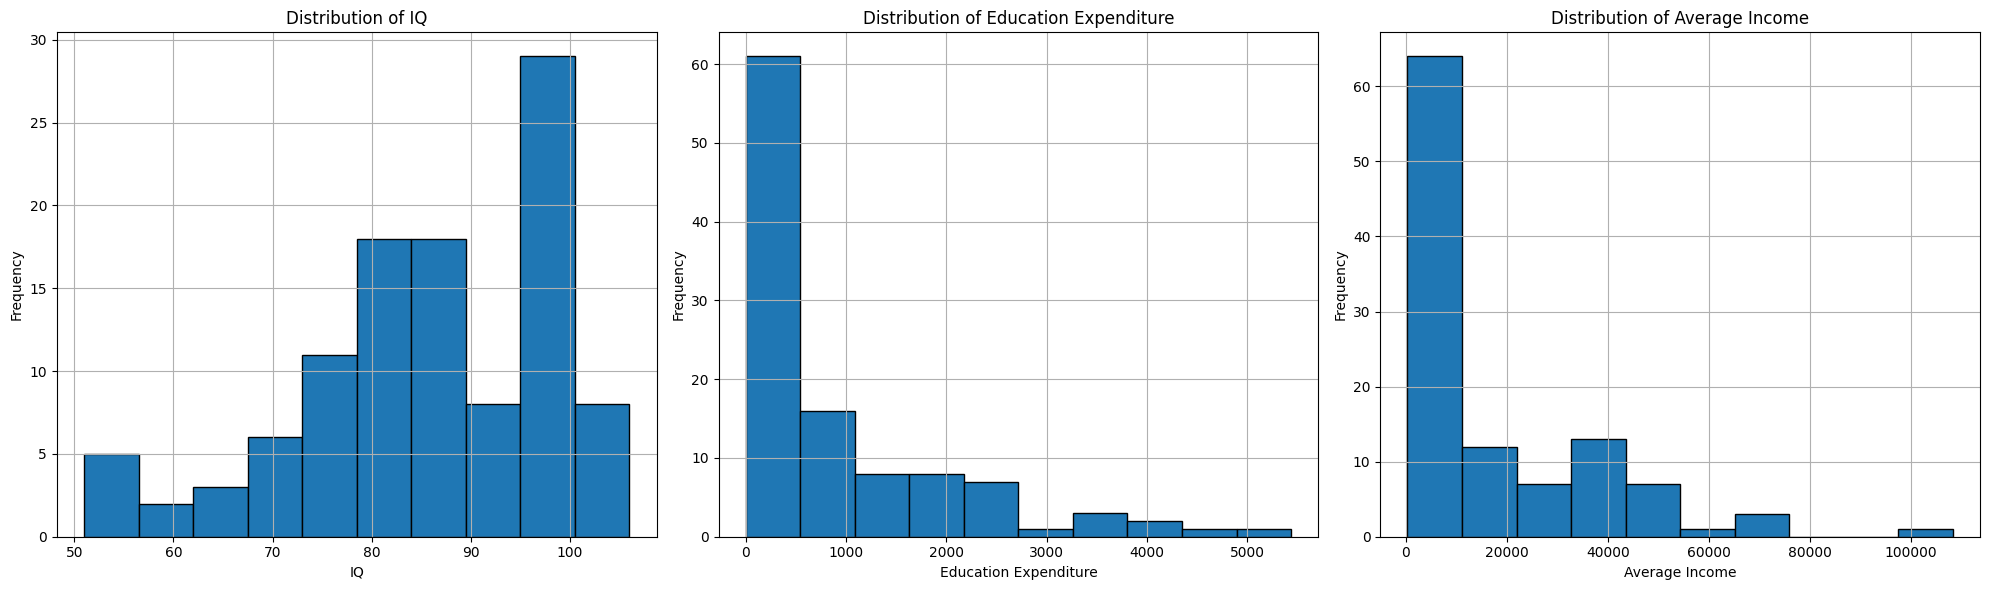

In [12]:
# Plot histograms
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
Iq_It_f['IQ'].hist(bins=10, edgecolor='black')
plt.title('Distribution of IQ')
plt.xlabel('IQ')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
Iq_It_f['education_expenditure'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Education Expenditure')
plt.xlabel('Education Expenditure')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
Iq_It_f['avg_income'].hist(bins=10, edgecolor='black')
plt.title('Distribution of Average Income')
plt.xlabel('Average Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

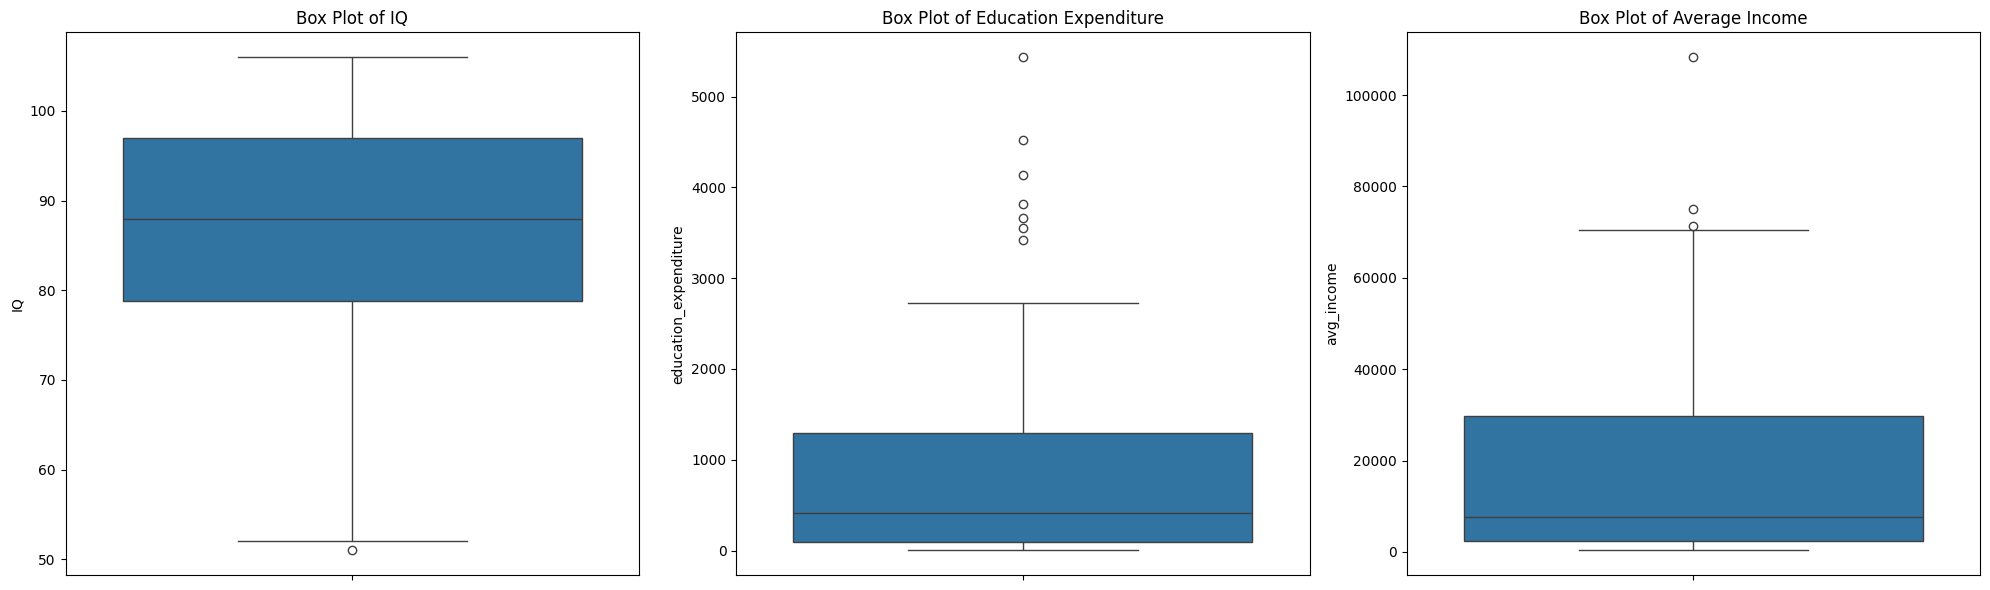

In [13]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=Iq_It_f['IQ'])
plt.title('Box Plot of IQ')

plt.subplot(1, 3, 2)
sns.boxplot(y=Iq_It_f['education_expenditure'])
plt.title('Box Plot of Education Expenditure')

plt.subplot(1, 3, 3)
sns.boxplot(y=Iq_It_f['avg_income'])
plt.title('Box Plot of Average Income')

plt.tight_layout()
plt.show()


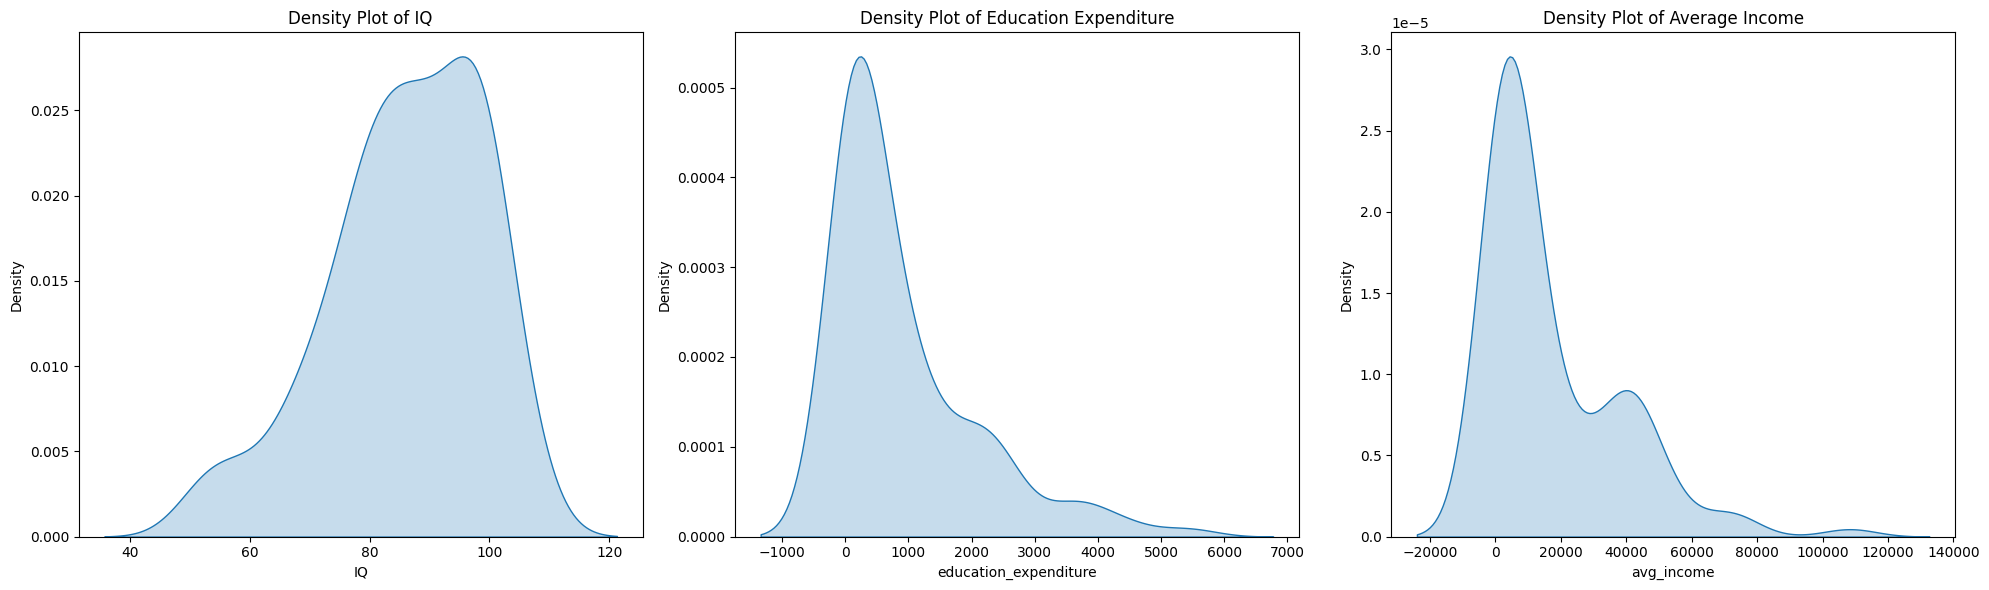

In [14]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.kdeplot(Iq_It_f['IQ'], fill=True)
plt.title('Density Plot of IQ')

plt.subplot(1, 3, 2)
sns.kdeplot(Iq_It_f['education_expenditure'], fill=True)
plt.title('Density Plot of Education Expenditure')

plt.subplot(1, 3, 3)
sns.kdeplot(Iq_It_f['avg_income'], fill=True)
plt.title('Density Plot of Average Income')

plt.tight_layout()
plt.show()


### Clone into train&test file

In [15]:
import os

In [16]:
# Cloning into train and test set
clone_directory = 'clone_data'

train_filepath = os.path.join(clone_directory, 'IqIt_train.csv')
test_filepath = os.path.join(clone_directory, 'IqIt_test.csv')

if not os.path.exists(clone_directory):
    os.makedirs(clone_directory)

Iq_It_f.to_csv(train_filepath)
Iq_It_f.to_csv(test_filepath)

# 2. Selection

In [17]:
IqIt_train = pd.read_csv("../src/clone_data/IqIt_train.csv")

## 2.1. Information Gain

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

Features: avg_income Score:  0.3423368582568509
Features: education_expenditure Score:  0.28545223740725945
Features: avg_temp Score:  0.2761023202523667


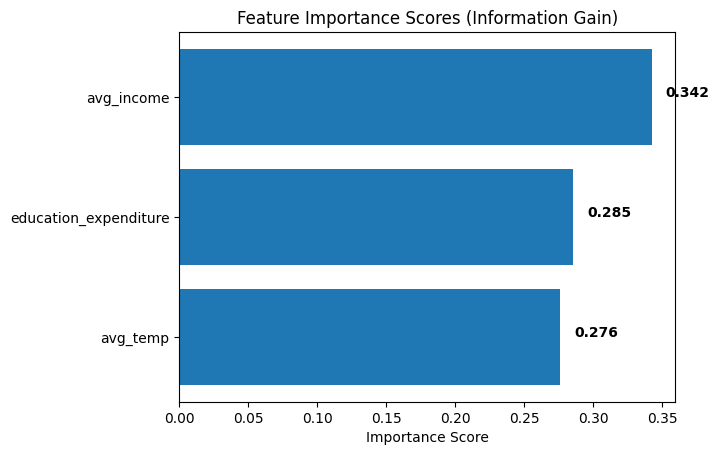

In [19]:
x = IqIt_train.drop(columns=["Unnamed: 0","country","Id","IQ","IQ_Level"])
y = IqIt_train["IQ_Level"]

#Apply Information Gain
ig = mutual_info_regression(x,y)

#Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(x.columns)):
    feature_scores[x.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

#Sort the features by importance scores and the sorted features
for feature, score in sorted_features:
    print("Features:", feature, "Score: ", score)

#Plot a horizontal bar chat of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

## 2.2. Chi_Square

In [20]:
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

<Axes: >

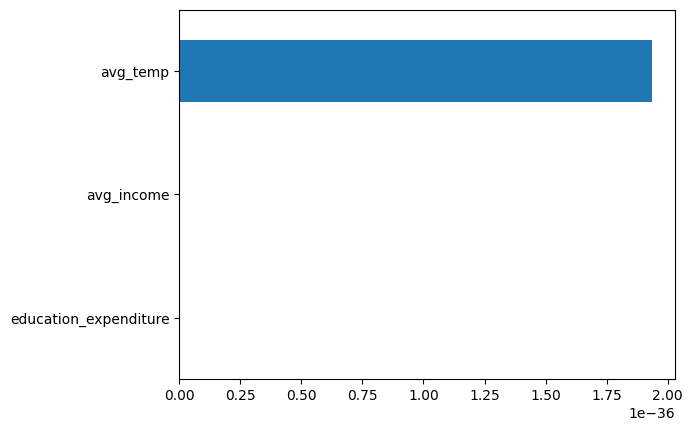

In [21]:
# Split the dataset into features and target
X = IqIt_train.drop(columns=["Unnamed: 0","country","Id","IQ","IQ_Level"])
y = IqIt_train["IQ_Level"]

chi_scores = chi2(X, y)

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=True, inplace=True)

p_values.plot.barh()

# 3. Split and Prepare Data

In [22]:
from sklearn.model_selection import train_test_split

## IQ Country and Income&Temperature

In [23]:
X_iqit = IqIt_train[
    [
        "education_expenditure",
        "avg_income",
    ]
]

Y_iqit = IqIt_train["IQ_Level"]

X_train_iqit, X_test_iqit, Y_train_iqit, Y_test_iqit = train_test_split(
    X_iqit, Y_iqit, test_size = 0.1, random_state=42
)

# 4. Modeling
#### Decision Tree, Logistic Regression, Random Forest, KNN, Naive Bayes, SVM

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

num_folds = 10
seed = 7
scoring = "accuracy"

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [25]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = num_folds, random_state = None)
    cv_results = cross_val_score(
        model, X_train_iqit, Y_train_iqit, cv = kfold, scoring = scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LR: 0.687778 (0.138104)
LDA: 0.687778 (0.130663)
KNN: 0.784444 (0.097904)
CART: 0.647778 (0.149571)
NB: 0.530000 (0.187909)
SVM: 0.718889 (0.102083)


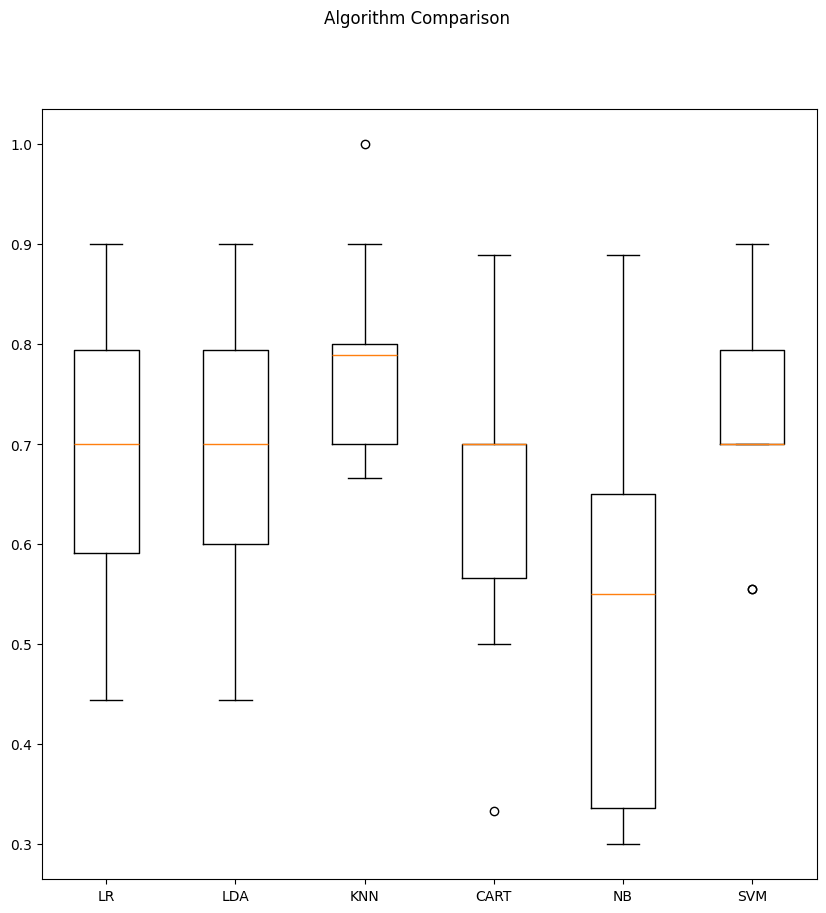

In [26]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [27]:
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_iqit, Y_train_iqit, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.708889 (0.087743)
ScaledLDA: 0.687778 (0.130663)
ScaledKNN: 0.742222 (0.094907)
ScaledCART: 0.670000 (0.123733)
ScaledNB: 0.530000 (0.187909)
ScaledSVM: 0.718889 (0.102083)


LDA - LR - SVM

In [28]:
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_iqit, Y_train_iqit, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

AB: 0.400000 (0.157292)
GBM: 0.637778 (0.152607)
RF: 0.731111 (0.140264)
ET: 0.698889 (0.106046)


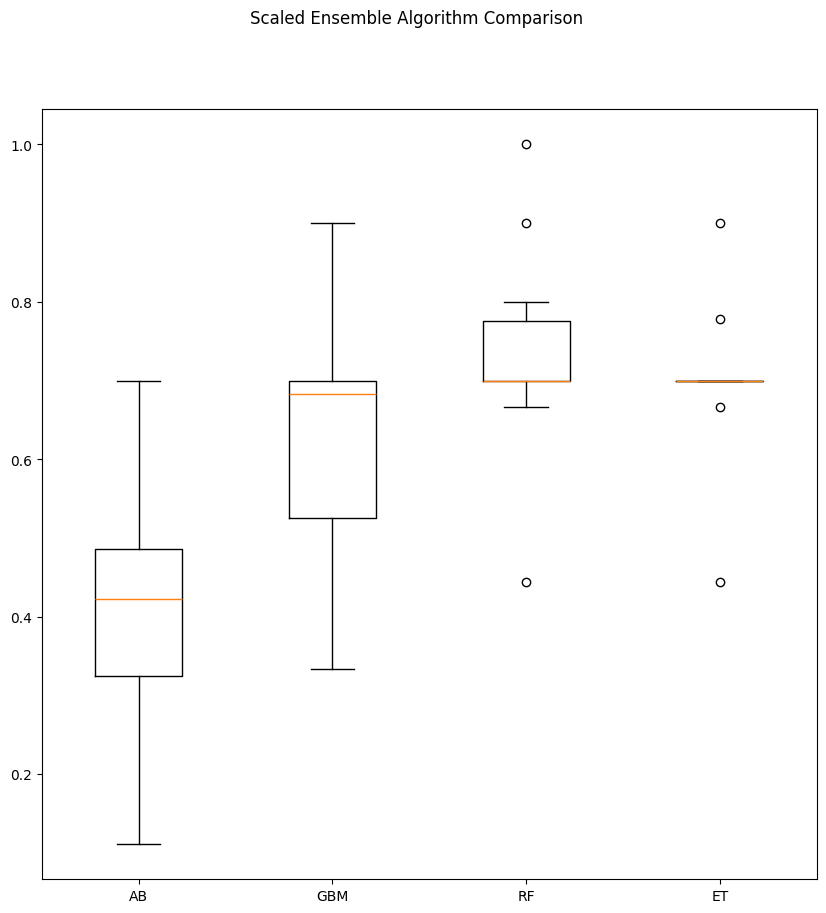

In [29]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# 5. Tuning Data

In [30]:
# Data standardization
scaler = StandardScaler().fit(X_train_iqit)
rescaledX = scaler.transform(X_train_iqit)

In [31]:
# LDA
# Implementing Grid Search and Linear Discriminant Analysis
# -> Finfing best parameters 
scaler = StandardScaler().fit(X_train_iqit)
rescaledX = scaler.transform(X_train_iqit)

shrinkage_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.05, 
0.25, 0.15, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
solver_values = ["lsqr", "eigen"]  # Loại bỏ 'svd' khỏi solver_values

param_grid = dict(shrinkage=shrinkage_values, solver=solver_values)

model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_iqit)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

## -> Here, we can get the best result. It provides the best hyperparameter for LDA model -> Helping improve and deploy the model with best performance
### These values use for several steps: evaluation on test set, model deployment, result analysis and report

Best: 0.687778 using {'shrinkage': 0.1, 'solver': 'lsqr'}
0.687778 (0.130663) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.687778 (0.130663) with: {'shrinkage': 0.1, 'solver': 'eigen'}
0.687778 (0.130663) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.687778 (0.130663) with: {'shrinkage': 0.2, 'solver': 'eigen'}
0.677778 (0.117168) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.677778 (0.117168) with: {'shrinkage': 0.3, 'solver': 'eigen'}
0.677778 (0.117168) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.677778 (0.117168) with: {'shrinkage': 0.4, 'solver': 'eigen'}
0.677778 (0.117168) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.677778 (0.117168) with: {'shrinkage': 0.5, 'solver': 'eigen'}
0.677778 (0.117168) with: {'shrinkage': 0.6, 'solver': 'lsqr'}
0.677778 (0.117168) with: {'shrinkage': 0.6, 'solver': 'eigen'}
0.677778 (0.117168) with: {'shrinkage': 0.7, 'solver': 'lsqr'}
0.677778 (0.117168) with: {'shrinkage': 0.7, 'solver': 'eigen'}
0.677778 (0.117168) with: {'shrinkage': 0.8, 'solver'

In [32]:
# LR
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalty = ["none", "elasticnet", "l1", "l2"]
C = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(solver=solver, penalty=penalty, C=C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_iqit)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

Best: 0.728889 using {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'lbfgs'}
0.126667 (0.096122) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'liblinear'}
nan (n

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

In [33]:
# SVM
param_grid = {
    "C": [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"],
}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_iqit)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Best: 0.730000 using {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.708889 (0.087743) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.656667 (0.113361) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.344444 (0.157370) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.344444 (0.157370) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.344444 (0.157370) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.730000 (0.088896) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.677778 (0.117168) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.656667 (0.113361) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.344444 (0.157370) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.344444 (0.157370) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.718889 (0.102083) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.708889 (0.098482) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.677778 (0.117168) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.656667 (0.113361) with: {'C': 10, 'gamma': 0.001, 'kernel': '

In [34]:
# ET
param_grid = dict(
    n_estimators=np.array([230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280])
)
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_iqit)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Best: 0.730000 using {'n_estimators': np.int64(230)}
0.730000 (0.109098) with: {'n_estimators': np.int64(230)}
0.730000 (0.109098) with: {'n_estimators': np.int64(235)}
0.730000 (0.109098) with: {'n_estimators': np.int64(240)}
0.730000 (0.109098) with: {'n_estimators': np.int64(245)}
0.730000 (0.109098) with: {'n_estimators': np.int64(250)}
0.730000 (0.109098) with: {'n_estimators': np.int64(255)}
0.730000 (0.109098) with: {'n_estimators': np.int64(260)}
0.730000 (0.109098) with: {'n_estimators': np.int64(265)}
0.730000 (0.109098) with: {'n_estimators': np.int64(270)}
0.730000 (0.109098) with: {'n_estimators': np.int64(275)}
0.730000 (0.109098) with: {'n_estimators': np.int64(280)}


In [35]:
# RF
param_grid = dict(n_estimators=np.array([35, 40, 45, 55, 60, 65, 50, 48, 49, 51, 52]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_iqit)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.742222 using {'n_estimators': np.int64(65)}
0.732222 (0.127119) with: {'n_estimators': np.int64(35)}
0.732222 (0.127119) with: {'n_estimators': np.int64(40)}
0.732222 (0.127119) with: {'n_estimators': np.int64(45)}
0.721111 (0.106394) with: {'n_estimators': np.int64(55)}
0.731111 (0.098982) with: {'n_estimators': np.int64(60)}
0.742222 (0.120062) with: {'n_estimators': np.int64(65)}
0.731111 (0.098982) with: {'n_estimators': np.int64(50)}
0.721111 (0.106394) with: {'n_estimators': np.int64(48)}
0.731111 (0.098982) with: {'n_estimators': np.int64(49)}
0.742222 (0.120062) with: {'n_estimators': np.int64(51)}
0.731111 (0.098982) with: {'n_estimators': np.int64(52)}


## Results
- **LDA: Best: 0.029210 using {'shrinkage': 0.1, 'solver': 'lsqr'}**
- **LR: Best: 0.031707 using {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}**
- **SVM: Best: 0.034088 using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}**
- **ET: Best: 0.021893 using {'n_estimators': np.int64(230)}**
- **RF: Best: 0.026771 using {'n_estimators': np.int64(35)}**

# 6. Data Fitting

## 6.1. LDA

In [36]:
# LDA  'shrinkage': 0.1, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.3, solver="lsqr")
modelLDA.fit(X_train_iqit, Y_train_iqit)
predictions = modelLDA.predict(X_test_iqit)

print(accuracy_score(Y_train_iqit, modelLDA.predict(X_train_iqit)))
print(accuracy_score(Y_test_iqit, predictions))
print(confusion_matrix(Y_test_iqit, predictions))
print(classification_report(Y_test_iqit, predictions))

0.6907216494845361
0.6363636363636364
[[0 2 0]
 [0 5 1]
 [0 1 2]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.62      0.83      0.71         6
           3       0.67      0.67      0.67         3

    accuracy                           0.64        11
   macro avg       0.43      0.50      0.46        11
weighted avg       0.52      0.64      0.57        11



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## 6.2. LR

In [37]:
# LR 'C': 0.1, 'penalty': 'l2', 'solver': 'saga'
modelLG = LogisticRegression(C=10, penalty="l2", solver="liblinear")
modelLG.fit(X_train_iqit, Y_train_iqit)
predictions = modelLG.predict(X_test_iqit)

print(accuracy_score(Y_train_iqit, modelLG.predict(X_train_iqit)))
print(accuracy_score(Y_test_iqit, predictions))
print(confusion_matrix(Y_test_iqit, predictions))
print(classification_report(Y_test_iqit, predictions))

0.6494845360824743
0.45454545454545453
[[0 2 0]
 [0 2 4]
 [0 0 3]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.33      0.40         6
           3       0.43      1.00      0.60         3

    accuracy                           0.45        11
   macro avg       0.31      0.44      0.33        11
weighted avg       0.39      0.45      0.38        11



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## 6.3. SVM

In [38]:
# SVM 'C': 10, 'gamma': 0.1, 'kernel': 'rbf'
modelSVM = SVC(C=1000000, gamma=0.001, kernel="rbf")
modelSVM.fit(X_train_iqit, Y_train_iqit)
predictions = modelSVM.predict(X_test_iqit)

print(accuracy_score(Y_train_iqit, modelSVM.predict(X_train_iqit)))
print(accuracy_score(Y_test_iqit, predictions))
print(confusion_matrix(Y_test_iqit, predictions))
print(classification_report(Y_test_iqit, predictions))

1.0
0.45454545454545453
[[1 0 1]
 [1 1 4]
 [0 0 3]]
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       1.00      0.17      0.29         6
           3       0.38      1.00      0.55         3

    accuracy                           0.45        11
   macro avg       0.62      0.56      0.44        11
weighted avg       0.74      0.45      0.40        11



## 6.4. ET

In [39]:
# ET 'n_estimators': 230
modelET = ExtraTreesClassifier(n_estimators=250)
modelET.fit(X_train_iqit, Y_train_iqit)
predictions = modelET.predict(X_test_iqit)

print(accuracy_score(Y_train_iqit, modelET.predict(X_train_iqit)))
print(accuracy_score(Y_test_iqit, predictions))
print(confusion_matrix(Y_test_iqit, predictions))
print(classification_report(Y_test_iqit, predictions))

1.0
0.45454545454545453
[[1 1 0]
 [1 2 3]
 [0 1 2]]
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.50      0.33      0.40         6
           3       0.40      0.67      0.50         3

    accuracy                           0.45        11
   macro avg       0.47      0.50      0.47        11
weighted avg       0.47      0.45      0.45        11



## 6.5. RF

In [40]:
# RF 'n_estimators': 35'
modelRF = RandomForestClassifier(n_estimators=51)
modelRF.fit(X_train_iqit, Y_train_iqit)
predictions = modelRF.predict(X_test_iqit)

print(accuracy_score(Y_train_iqit, modelRF.predict(X_train_iqit)))
print(accuracy_score(Y_test_iqit, predictions))
print(confusion_matrix(Y_test_iqit, predictions))
print(classification_report(Y_test_iqit, predictions))

1.0
0.45454545454545453
[[1 1 0]
 [1 1 4]
 [0 0 3]]
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.50      0.17      0.25         6
           3       0.43      1.00      0.60         3

    accuracy                           0.45        11
   macro avg       0.48      0.56      0.45        11
weighted avg       0.48      0.45      0.39        11



# 7. Apply Model

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

iqit_test = pd.read_csv("../src/clone_data/IqIt_test.csv")

X_iqit_test = iqit_test[
    [
        "education_expenditure",
        "avg_income",
    ]
]
Y_iqit_test = iqit_test["IQ_Level"]

Accuracy Score: 0.6666666666666666
Confusion Matrix:
 [[ 0 14  0]
 [ 0 44  5]
 [ 0 17 28]]
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.59      0.90      0.71        49
           3       0.85      0.62      0.72        45

    accuracy                           0.67       108
   macro avg       0.48      0.51      0.48       108
weighted avg       0.62      0.67      0.62       108



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

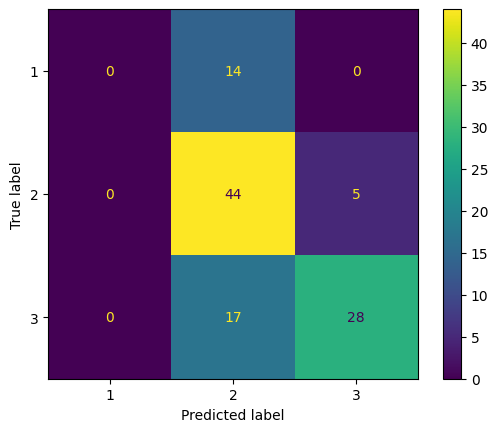

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create and fit the LDA model
modelLDA = LinearDiscriminantAnalysis(solver="lsqr")
modelLDA.fit(X_train_iqit, Y_train_iqit)

# Make predictions
predictions = modelLDA.predict(X_iqit_test)

# Print evaluation metrics
print("Accuracy Score:", accuracy_score(Y_iqit_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(Y_iqit_test, predictions))
print("Classification Report:\n", classification_report(Y_iqit_test, predictions))

# Display confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_iqit_test, predictions),
    display_labels=modelLDA.classes_,
)
disp.plot()
plt.show()


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

0.4166666666666667
[[ 0  0 14]
 [ 0  0 49]
 [ 0  0 45]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00        49
           3       0.42      1.00      0.59        45

    accuracy                           0.42       108
   macro avg       0.14      0.33      0.20       108
weighted avg       0.17      0.42      0.25       108



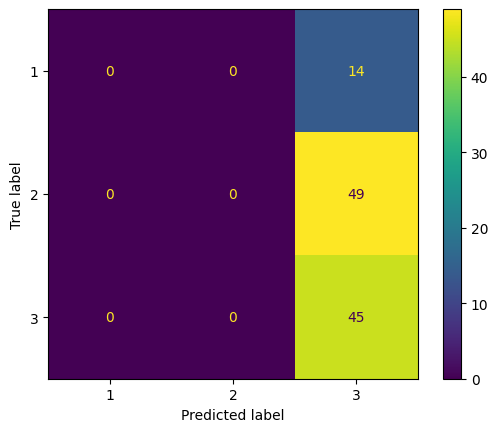

In [43]:
modelLG = LogisticRegression(C=1e-06, penalty="l2", solver="liblinear")
modelLG.fit(X_train_iqit, Y_train_iqit)
predictions = modelLG.predict(X_iqit_test)

print(accuracy_score(Y_iqit_test, predictions))
print(confusion_matrix(Y_iqit_test, predictions))
print(classification_report(Y_iqit_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_iqit_test, predictions),
    display_labels=modelLG.classes_,
)
t = disp.plot()
plt.show()

0.9537037037037037
[[12  2  0]
 [ 0 49  0]
 [ 0  3 42]]
              precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.91      1.00      0.95        49
           3       1.00      0.93      0.97        45

    accuracy                           0.95       108
   macro avg       0.97      0.93      0.95       108
weighted avg       0.96      0.95      0.95       108



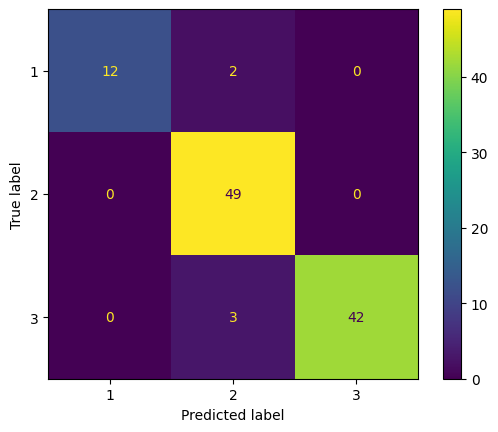

In [44]:
modelSVM = SVC(C=10000, gamma=1, kernel="rbf")
modelSVM.fit(X_train_iqit, Y_train_iqit)
predictions = modelSVM.predict(X_iqit_test)

print(accuracy_score(Y_iqit_test, predictions))
print(confusion_matrix(Y_iqit_test, predictions))
print(classification_report(Y_iqit_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_iqit_test, predictions),
    display_labels=modelSVM.classes_,
)
t = disp.plot()
plt.show()

0.9444444444444444
[[13  1  0]
 [ 1 45  3]
 [ 0  1 44]]
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.96      0.92      0.94        49
           3       0.94      0.98      0.96        45

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



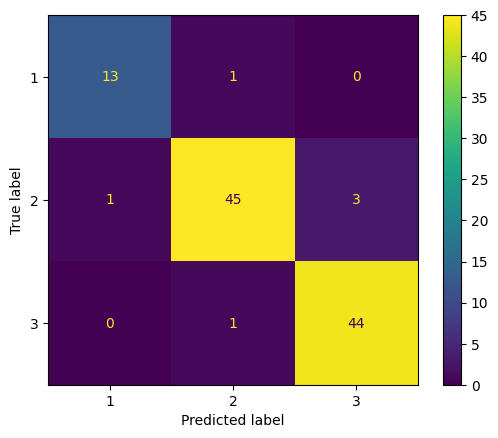

In [45]:
modelET = ExtraTreesClassifier(n_estimators=240)
modelET.fit(X_train_iqit, Y_train_iqit)
predictions = modelET.predict(X_iqit_test)

print(accuracy_score(Y_iqit_test, predictions))
print(confusion_matrix(Y_iqit_test, predictions))
print(classification_report(Y_iqit_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_iqit_test, predictions),
    display_labels=modelET.classes_,
)
t = disp.plot()
plt.show()

0.9444444444444444
[[13  1  0]
 [ 1 44  4]
 [ 0  0 45]]
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.98      0.90      0.94        49
           3       0.92      1.00      0.96        45

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



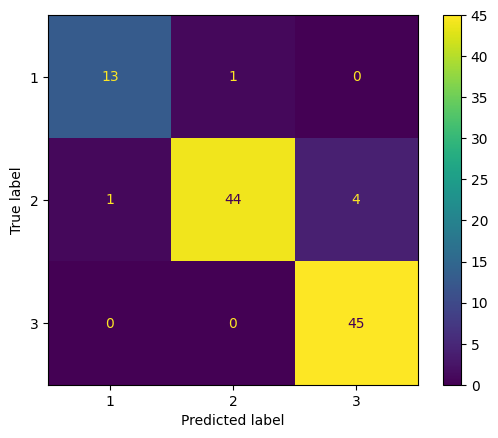

In [46]:
modelRF = RandomForestClassifier(n_estimators=60)
modelRF.fit(X_train_iqit, Y_train_iqit)
predictions = modelRF.predict(X_iqit_test)

print(accuracy_score(Y_iqit_test, predictions))
print(confusion_matrix(Y_iqit_test, predictions))
print(classification_report(Y_iqit_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_iqit_test, predictions),
    display_labels=modelRF.classes_,
)
t = disp.plot()
plt.show()

# 8. Visualization

In [47]:
import plotly.express as px
import nbformat

In [48]:
fig = px.scatter(IqIt_train, x="education_expenditure", y="IQ", title="Influence of Education Expenditure on IQ")
fig.update_traces(marker=dict(color='red'))
fig.show()

In [49]:
fig = px.bar(IqIt_train, x="Id", y="education_expenditure", title="Relationship Between Rank and Education Expenditure",
             labels={"Id": "Rank", "education_expenditure": "Education Expenditure"})
fig.update_traces(marker=dict(color='purple'))
fig.show()

In [50]:
fig = px.scatter(IqIt_train, x="avg_temp", y="IQ", title="Correlation between Temperature and IQ")
fig.show()